In [1]:
import re
import string
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from collections import Counter
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('Airline Review Dataset.csv')

In [3]:
df.shape

(23171, 20)

In [4]:
df.head(10)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
5,5,Adria Airways,1,"""Had very bad experience""",17th September 2019,True,Had very bad experience with rerouted and ca...,CR 900,Couple Leisure,Economy Class,Sarajevo to Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
6,6,Adria Airways,1,"""worse than the budget airlines""",6th September 2019,False,"Ljubljana to Zürich. Firstly, Ljubljana airp...",NaN,Business,Economy Class,Ljubljana to Zürich,September 2019,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no
7,7,Adria Airways,1,"""book another company""",24th August 2019,False,"First of all, I am not complaining about a s...",Bombardier CRJ,Solo Leisure,Economy Class,Timisoara to Munich,August 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
8,8,Adria Airways,1,"""combined two flights""",6th August 2019,True,Worst Airline ever! They combined two flight...,NaN,Solo Leisure,Economy Class,Pristina to Zürich via Ljubliana,August 2019,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no
9,9,Adria Airways,8,"""the crew was nice""",12th October 2018,True,Ljubljana to Munich. The homebase airport of ...,NaN,Family Leisure,Economy Class,Ljubljana to Munich,October 2018,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes


In [5]:
df['Review'][202]

'  Aer Lingus is a sad excuse for an airline. Not a single of our four flights was on time. We were almost twelve hours late to Paris and had to sit in the Dublin airport all day. There were no employees available to discuss flight details or compensation for delays. The flights also either said they had Wi-Fi but didn’t, or just said flat out they don’t have Wi-Fi. Disastrous airline and I will never fly with them again. Steer clear.'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [7]:
# Extract duplicates based on 'Airline Name' and 'Review' columns
duplicates = df[df.duplicated(subset=['Airline Name', 'Review'], keep=False)]
print(duplicates)

       Unnamed: 0             Airline Name Overall_Rating  \
1774         1774            Air Greenland              n   
1775         1775            Air Greenland              n   
3840         3840          Alaska Airlines              1   
3841         3841          Alaska Airlines              1   
7032         7032  China Southern Airlines              8   
...           ...                      ...            ...   
16645       16645              Ravn Alaska              4   
16646       16646              Ravn Alaska              5   
16647       16647              Ravn Alaska              6   
21131       21131                 Tunisair              2   
21132       21132                 Tunisair              9   

                                   Review_Title         Review Date  Verified  \
1774              Air Greenland customer review   18th October 2007     False   
1775              Air Greenland customer review       10th May 2007     False   
3840               "Not 

In [8]:
df = df.drop_duplicates(subset=['Airline Name', 'Review'])

In [9]:
df.shape

(23046, 20)

In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess(documents):
    processed_docs = []
    for doc in documents:
        text = re.sub(r'[^a-zA-Z\s]', '', doc) #Remove numbers and special characters
        tokens = text.lower().split()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
        processed_docs.append(" ".join(lemmatized_tokens))
    return processed_docs

df['preprocessed_review'] = preprocess(df['Review'])

In [11]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,...,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,...,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,...,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,...,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,...,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,...,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...


In [12]:
# Delete redundant columns
df.drop(columns=["Unnamed: 0", "Review_Title", "Review Date", "Verified", "Aircraft", "Type Of Traveller", "Route", "Date Flown"], inplace=True)

In [13]:
df.head(10)

,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review
0,AB Aviation,9,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...
1,AB Aviation,1,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...
2,AB Aviation,1,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...
3,Adria Airways,1,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...
4,Adria Airways,1,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...
5,Adria Airways,1,Had very bad experience with rerouted and ca...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,had very bad experience with rerouted and canc...
6,Adria Airways,1,"Ljubljana to Zürich. Firstly, Ljubljana airp...",Economy Class,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no,ljubljana to zrich firstly ljubljana airport i...
7,Adria Airways,1,"First of all, I am not complaining about a s...",Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,first of all i am not complaining about a spec...
8,Adria Airways,1,Worst Airline ever! They combined two flight...,Economy Class,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no,worst airline ever they combined two flight to...
9,Adria Airways,8,Ljubljana to Munich. The homebase airport of ...,Economy Class,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes,ljubljana to munich the homebase airport of ad...


In [14]:
df.isnull().sum()

,0
Airline Name,0
Overall_Rating,0
Review,0
Seat Type,988
Seat Comfort,4042
Cabin Staff Service,4147
Food & Beverages,8553
Ground Service,4680
Inflight Entertainment,12222
Wifi & Connectivity,17129


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23046 entries, 0 to 23170
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23046 non-null  object 
 1   Overall_Rating          23046 non-null  object 
 2   Review                  23046 non-null  object 
 3   Seat Type               22058 non-null  object 
 4   Seat Comfort            19004 non-null  float64
 5   Cabin Staff Service     18899 non-null  float64
 6   Food & Beverages        14493 non-null  float64
 7   Ground Service          18366 non-null  float64
 8   Inflight Entertainment  10824 non-null  float64
 9   Wifi & Connectivity     5917 non-null   float64
 10  Value For Money         22088 non-null  float64
 11  Recommended             23046 non-null  object 
 12  preprocessed_review     23046 non-null  object 
dtypes: float64(7), object(6)
memory usage: 2.5+ MB


In [16]:
# Converting String Values to Numbers
df["Overall_Rating"] = pd.to_numeric(df["Overall_Rating"], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23046 entries, 0 to 23170
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23046 non-null  object 
 1   Overall_Rating          22298 non-null  float64
 2   Review                  23046 non-null  object 
 3   Seat Type               22058 non-null  object 
 4   Seat Comfort            19004 non-null  float64
 5   Cabin Staff Service     18899 non-null  float64
 6   Food & Beverages        14493 non-null  float64
 7   Ground Service          18366 non-null  float64
 8   Inflight Entertainment  10824 non-null  float64
 9   Wifi & Connectivity     5917 non-null   float64
 10  Value For Money         22088 non-null  float64
 11  Recommended             23046 non-null  object 
 12  preprocessed_review     23046 non-null  object 
dtypes: float64(8), object(5)
memory usage: 2.5+ MB


**TextBlob**

In [18]:
from textblob import TextBlob
def textBlob_polarity_function(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity

In [19]:
df['textBlob_sentiment_score'] = df['preprocessed_review'].apply(textBlob_polarity_function)

In [20]:
pd.set_option('display.max_colwidth', None)
df[['preprocessed_review', 'textBlob_sentiment_score']].head()

,preprocessed_review,textBlob_sentiment_score
0,moroni to moheli turned out to be a pretty decent airline online booking worked well checkin and boarding wa fine and the plane looked well maintained it a very short flight just minute or so so i didnt expect much but they still managed to hand our a bottle of water and some biscuit which i though wa very nice both flight on time,0.302222
1,moroni to anjouan it is a very small airline my ticket advised me to turn up at hr which i did there wa confusion at this small airport i wa then directed to the office of ab aviation which wa still closed it opened at hr and i wa told that the flight had been put back to hr and that they had tried to contact me this could not be true a they did not have my phone number i wa with a local guide and he had not been informed either i presume that i wa bumped off the later flight did operate but a usual there wa confusion at checkin the flight wa only min and there were no further problem not a good airline but it is the only one for comoros,-0.077083
2,anjouan to dzaoudzi a very small airline and the only airline based in comoros checkin wa disorganised because of local with big package and disinterested staff the flight wa fortunately short min took off on time and landed on time with a short flight like there wa of course no inflight entertainment nor cabin service except for biscuit and a bottle of water which wa quite nice,0.039286
3,please do a favor yourself and do not fly with adria on the route from munich to pristina in july they lost my luggage and for day in a row despite numerous phone call they were not able to locate it day later the luggage arrived at the destination completely ruined applying for compensation they ignored my request foolishly again i booked another flight with them euro frankfurt pristina in september they cancelled the flight with no reason hour before the departure desperate phone call to customer service to get anything rerouting compensation etc were not responded i will never fly again with adria what a disgrace shame on you adria for constantly deceiving your customer,-0.193750
4,do not book a flight with this airline my friend and i should have returned from sofia to amsterdam on september and day before they sent u an sm informing the flight wa cancelled for straight day we tried to reach the airline and the web agent edreams and we did not get a solution finally hour before our cancelled flight time and after minute on a call waiting the airline wa able to get u on a flight with lufthansa do not book adria airway it is unreliable and in our case it ruined our last day of holiday since we needed to be on the phone all day,0.175000


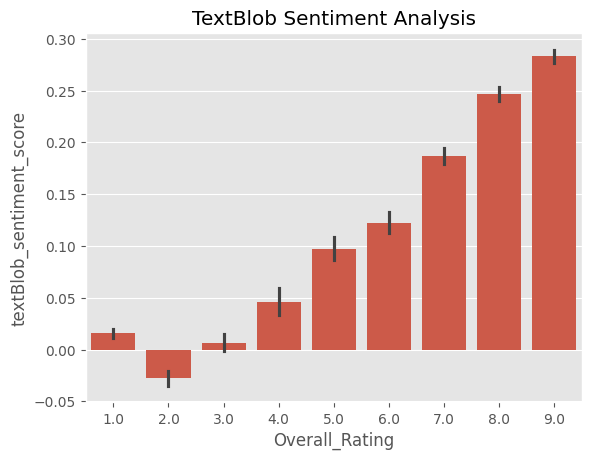

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

ax = sns.barplot(data=df, x='Overall_Rating', y='textBlob_sentiment_score')
ax.set_title('TextBlob Sentiment Analysis')
plt.show()

**VADER - Valence Aware Dictionary and sEntiment Reasoner**

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [24]:
# Add an 'Id' column starting from 1
df['Id'] = range(1, len(df) + 1)

In [25]:
# Move 'Id' column to the first position
df.insert(0, 'Id', df.pop('Id'))

In [26]:
pd.set_option('display.max_colwidth', 50)
df.head()

,Id,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,textBlob_sentiment_score
0,1,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...,0.302222
1,2,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...,-0.077083
2,3,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...,0.039286
3,4,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...,-0.193750
4,5,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...,0.175000


In [27]:
res = {}
for i, row in df.iterrows():
    text = row['preprocessed_review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [28]:
res = pd.DataFrame(res).T
res = res.reset_index().rename(columns={'index': 'Id'})

res['Id'] = res['Id'].astype(str)
df['Id'] = df['Id'].astype(str)

df = df.merge(res, how='left', on='Id')

In [29]:
df.head()

,Id,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,textBlob_sentiment_score,neg,neu,pos,compound
0,1,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...,0.302222,0.000,0.779,0.221,0.9192
1,2,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...,-0.077083,0.115,0.876,0.009,-0.9242
2,3,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...,0.039286,0.031,0.850,0.119,0.7346
3,4,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...,-0.193750,0.200,0.762,0.038,-0.9583
4,5,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...,0.175000,0.080,0.841,0.079,-0.0418


In [30]:
# Rename the 'compound' column to 'vader_sentiment_score'
df.rename(columns={'compound': 'vader_sentiment_score'}, inplace=True)

In [31]:
df.head()

,Id,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,textBlob_sentiment_score,neg,neu,pos,vader_sentiment_score
0,1,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...,0.302222,0.000,0.779,0.221,0.9192
1,2,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...,-0.077083,0.115,0.876,0.009,-0.9242
2,3,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...,0.039286,0.031,0.850,0.119,0.7346
3,4,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...,-0.193750,0.200,0.762,0.038,-0.9583
4,5,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...,0.175000,0.080,0.841,0.079,-0.0418


In [32]:
df.drop(columns=['neg', 'neu', 'pos'], inplace=True)

In [33]:
df.head()

,Id,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,textBlob_sentiment_score,vader_sentiment_score
0,1,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...,0.302222,0.9192
1,2,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...,-0.077083,-0.9242
2,3,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...,0.039286,0.7346
3,4,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...,-0.193750,-0.9583
4,5,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...,0.175000,-0.0418


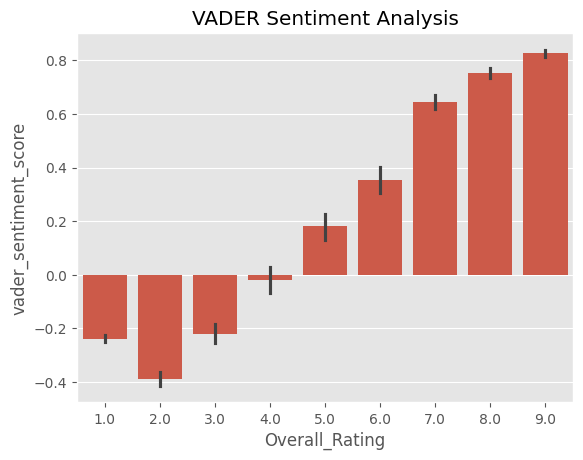

In [34]:
ax = sns.barplot(data=df, x='Overall_Rating', y='vader_sentiment_score')
ax.set_title('VADER Sentiment Analysis')
plt.show()